# Analysis of GDP and Life Expectancy

## Introduction

The aim of this analysis is to give you a basic idea of how countries gross domestic product (GDP) is changing and also how life expectancy is changing.<br> We will also show whether there is any dependence between these variables. We obtained the data from the web <a href="https://ourworldindata.org/">Ourworldindata.org</a>.<br> Due to the scale we analyze only 5 countries between 2000 and 2017. We received these countries and periods as assignments from Codeademy, within which we created this project.


## Data

I will now upload the important and necessary libraries for processing<br> and also upload the data into the required format.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels
from IPython.display import display

In [4]:
df = pd.read_csv("all_data.csv")

In [5]:
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


After checking the data types, column names and possible null variables, I decided to change the name for life expectancy<br> and the data type for gross domestic product. The table clearly shows that we have no null values here, so there is no need to modify or add values.

I've decided to gdp to **billions of dollars** for clarity in the numbers <br>
and the order in which this quantity is normally reported.

In [7]:
df.columns = map(str.lower,df.columns)
df.rename(columns={"life expectancy at birth (years)":"life_ex_years","gdp":"gdp_b"},inplace= True)
df.gdp_b = df.gdp_b/1000000000
df.head()

,country,year,life_ex_years,gdp_b
0,Chile,2000,77.3,77.860932
1,Chile,2001,77.3,70.979924
2,Chile,2002,77.8,69.736811
3,Chile,2003,77.9,75.643460
4,Chile,2004,78.0,99.210393


## Analysis

### Summary

First, I want to find out how often people live to a certain age in our countries and what the most common gross domestic product is in these countries.

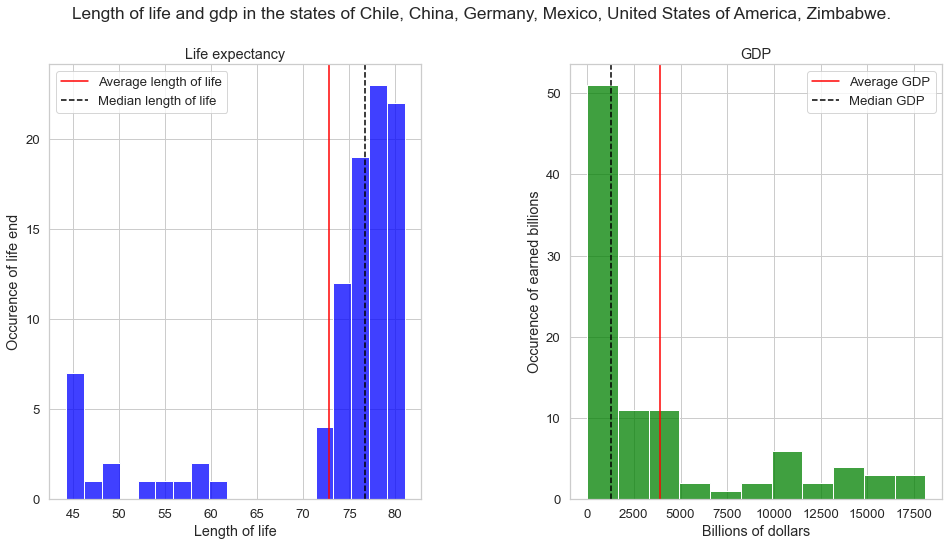

In [15]:
"""Je zde použita i angličtina, protože tato analýza bude dvojjazyčná."""
f = plt.figure(figsize = (16,8))
sns.set(font_scale = 1.2,style="whitegrid")

countries = df.country.unique()
countries_title = ", ".join(list(countries))
#f.suptitle(f"Délka života a hrubý domácí produkt v Chile,Číně,Mexiku,USA a Zimbabwe.")
f.suptitle(f"Length of life and gdp in the states of {countries_title}.")

plt.subplot(1,2,1)
ax = sns.histplot(df.life_ex_years, color = "blue")
mean_lf,med_lf = df.life_ex_years.mean(),df.life_ex_years.median()
plt.axvline(mean_lf,color="red",linestyle="-",label="Average length of life")
plt.axvline(med_lf,color="black",linestyle="--",label="Median length of life")
ax.set_title("Life expectancy")
ax.set_xlabel("Length of life")
ax.set_ylabel("Occurence of life end")
#plt.axvline(mean_lf,color="red",linestyle="-",label="Průměrná délka života")
#plt.axvline(med_lf,color="black",linestyle="--",label="Střední délka života")
#ax.set_title("Rozsah délek života")
#ax.set_xlabel("Délka života")
#ax.set_ylabel("Četnost")
plt.legend()

plt.subplot(1,2,2)
ax2 = sns.histplot(df.gdp_b,color="green")
mean_gdp,med_gdp=df.gdp_b.mean(),df.gdp_b.median()
plt.axvline(mean_gdp,color="red",linestyle="-",label="Average GDP")
plt.axvline(med_gdp,color="black",linestyle="--",label="Median GDP")
ax2.set_title("GDP")
ax2.set_xlabel("Billions of dollars")
ax2.set_ylabel("Occurence of earned billions")
#plt.axvline(mean_gdp,color="red",linestyle="-",label="Průměr HDP")
#plt.axvline(med_gdp,color="black",linestyle="--",label="Střední HDP")
#ax2.set_title("HDP")
#ax2.set_xlabel("Milliardy dolarů")
#ax2.set_ylabel("Četnost")

plt.legend()

plt.subplots_adjust(wspace=0.4)
plt.savefig("imgseng/hist_gdp_lfe.png")
plt.show()

### Life expectancy and GDP trends

I want to find out how life expectancy has evolved in each country in recent years.<br>
I also want to find out the evolution of GDP in each country over this period.

#### Life expectancy

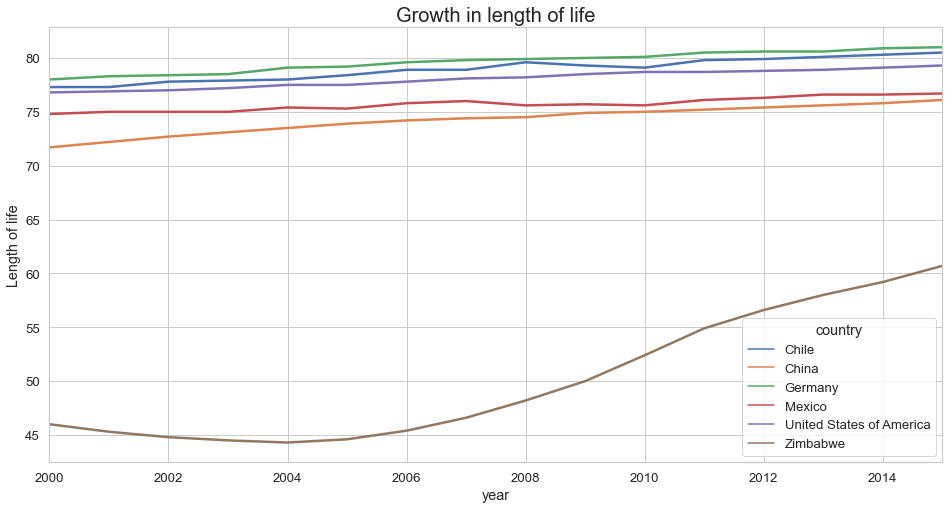

In [13]:
fig,axes = plt.subplots(1,1,figsize=(16,8))
sns.lineplot(data =df,x ="year",y= "life_ex_years",hue="country",markers=True,linewidth=2.5)
plt.xlim(2000,2015)
#plt.title("Vývoj dosažené délky života")
#plt.ylabel("Dosažená délka života")
#plt.xlabel("Roky")
#plt.legend(title="země")
plt.title("Growth in length of life",fontsize=20)
plt.ylabel("Length of life")
plt.savefig("imgseng/line_lfe_summary.png")
plt.show()

The graph shows that the most significant change in life expectancy is in Zimbabwe.<br>
To better see the differences, we select all countries except Zimbabwe. 

##### Trends of life expectancy except Zimbabwe

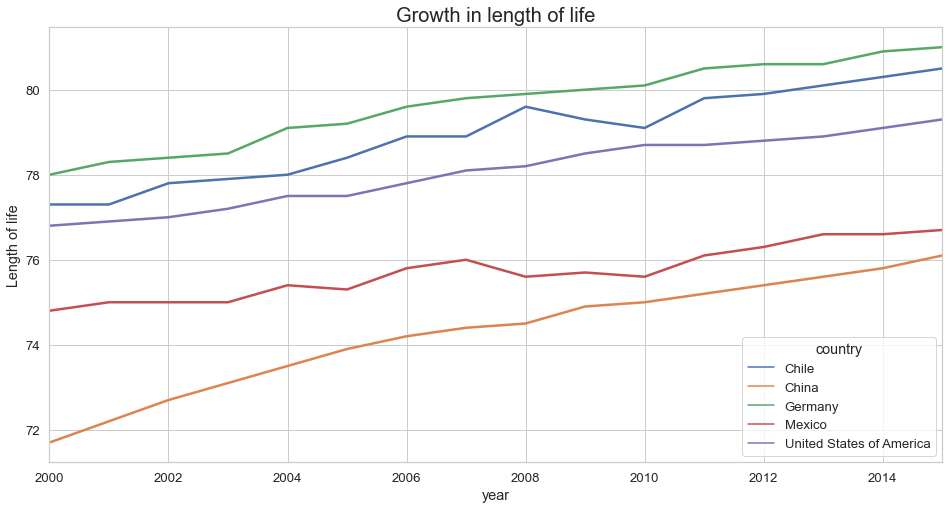

In [14]:
fig,axes = plt.subplots(1,1,figsize=(16,8))
sns.lineplot(data = df[df.country != "Zimbabwe"],x ="year",y= "life_ex_years",hue="country",markers=True,linewidth=2.5)
plt.xlim(2000,2015)
#plt.title("Vývoj dosažené délky života kromě Zimbabwe")
#plt.ylabel("Dosažená délka života")
#plt.xlabel("Roky")
#plt.legend(title="země")
plt.title("Growth in length of life",fontsize=20)
plt.ylabel("Length of life")
plt.savefig("imgseng/line_lfe_summary_xzimbabwe.png")
plt.show()

Now we have a much clearer chart for drawing conclusions.

#### GDP

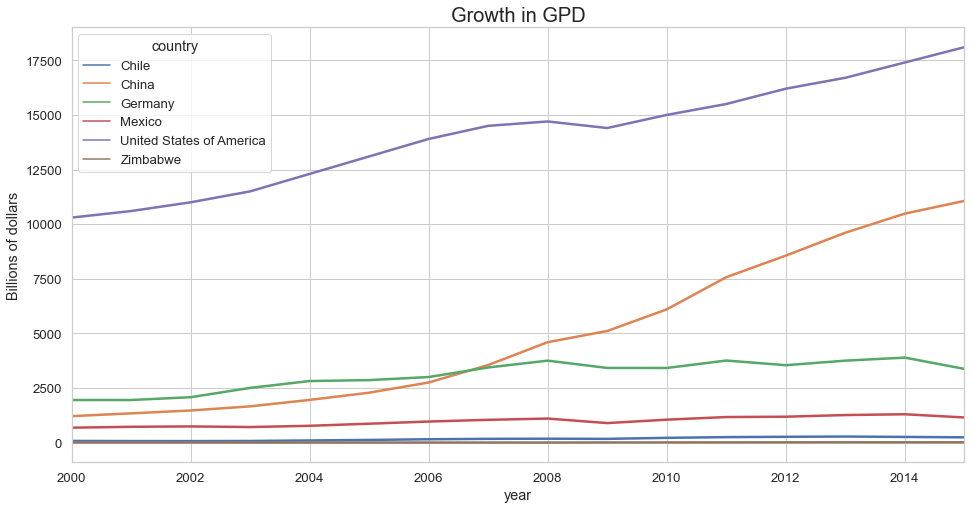

In [16]:
fig,axes = plt.subplots(1,1,figsize=(16,8))
sns.lineplot(data =df,x ="year",y= "gdp_b",hue="country",markers=True,linewidth=2.5)
plt.xlim(2000,2015)
#plt.title("Vývoj HDP")
#plt.ylabel("Milliardy dollarů")
plt.title("Growth in GPD",fontsize=20)
plt.ylabel("Billions of dollars")
#plt.legend(title= "Země")
plt.savefig("imgseng/line_gdp_summary.png")
plt.show()

Here we see the evolution of GDP in each country. It can be seen that the most significant change has occurred in the US,<br> where there has been very strong growth. <br>Since we have developments in countries with GDP below 2500 billion, I will show these countries in more detail.


##### Countries with lower GDP

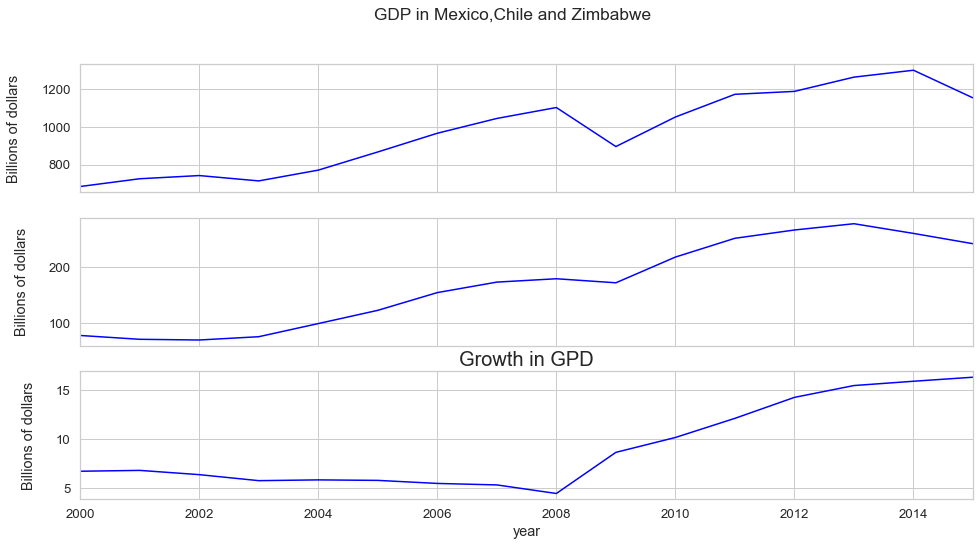

In [23]:
fig,axes = plt.subplots(3,figsize=(16,8),sharex=True)
lower_gdp_df = df[df.gdp_b < 2500]
for i,country in enumerate(["Mexico","Chile","Zimbabwe"]):
    sns.lineplot(data=lower_gdp_df[lower_gdp_df["country"] == country],x="year",y="gdp_b",ax=axes[i],color="blue")
    axes[i].set_ylabel(ylabel="Billions of dollars",labelpad = 20)
    plt.subplots_adjust(hspace=0.2)
#plt.xlabel("Roky")
plt.xlim(2000,2015)
#fig.suptitle("Vývoj HDP v zemích pod 2500 milliard")
fig.suptitle("GDP in Mexico,Chile and Zimbabwe")
plt.title("Growth in GPD",fontsize=20)
plt.savefig("imgseng/line_gdp_lower_2500.png")
plt.show()

By dividing the graph into individual countries, we can see that GDP growth in these countries was not negligible either,<br> although it 
it looked like it from the outside.

### The relation between GDP and life expectancy

I would like to see if there is any correlation between what a country's GDP is and its life expectancy.

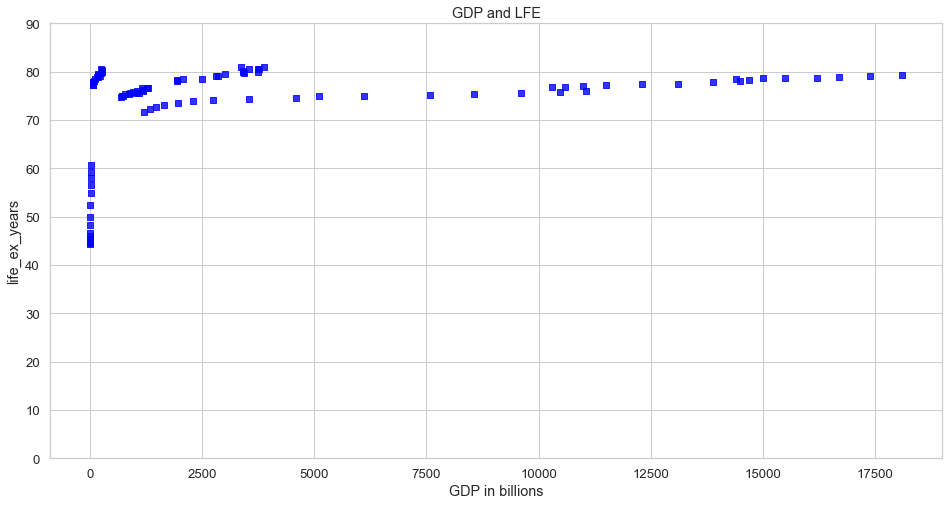

In [20]:
fig,axe= plt.subplots(1,1,figsize=(16,8))
hdp_scat = sns.regplot(data = df,x="gdp_b",y ="life_ex_years",ax=axe,
            marker="s",color="blue",fit_reg=False)
#plt.title("HDP a délka života")
#plt.xlabel("HDP")
#plt.ylabel("Délka života")
plt.title("GDP and LFE")
plt.xlabel("GDP in billions")
plt.ylim(0,90)
plt.savefig("imgseng/Scatter_gdp_lfe.png")
plt.show()

Although we can see signs of linear growth here, we should notice several clusters that have very similar GDP values.<br>We will therefore perform a logarithmic transformation to get a better representation of the life expectancy values.<br>

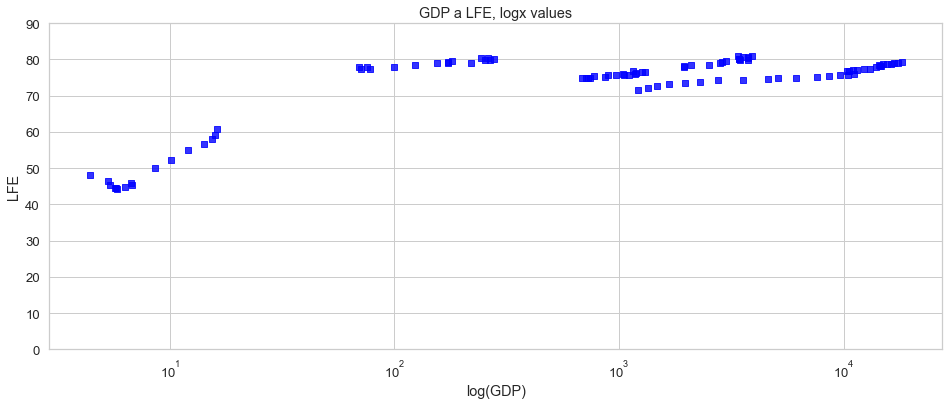

In [24]:
fig,axe= plt.subplots(1,1,figsize=(16,6))
hdp_scat = sns.regplot(data = df,x="gdp_b",y ="life_ex_years",ax=axe,
            marker="s",color="blue",fit_reg = False)
plt.title("GDP a LFE, logx values")
plt.xlabel("log(GDP)")
plt.ylabel("LFE")
#plt.title("HDP a délka života-log hodnoty")
#plt.xlabel("HDP")
#plt.ylabel("Délka života")
plt.ylim(0,90)
hdp_scat.set(xscale="log")
plt.savefig("imgseng/scatter_log_gdp_lfe.png")
plt.show()


## Conclusion

### Results

**Observations and results:**

* Our histogram shows that the average life expectancy is more often higher than 75, although the average life expectancy **{{round(mean_lf,3)}}** and the median is even higher **{{round(mean_lf,3)}}**. This is the distribution given by our outliers, which exhibit left skewness.
* The situation is reversed for GDP. In many cases, countries report incomes of up to $5000 billion or less. However, several times ( higher income was achieved), which creates a right skew in the graph. It can be seen here that the average GDP is higher than the median.

In [28]:
cor,p_value = pearsonr(df.gdp_b,df.life_ex_years)
cor = round(cor,3)

![histogram](imgseng/hist_gdp_lfe.png)

#### LFE

![život](imgseng/line_lfe_summary.png)

In [33]:
zim = df[df.country == "Zimbabwe"]
zim_lf_max = zim.life_ex_years.max()
zim_lf_min = zim.life_ex_years.min()
life_diff = round(maximum - minimum,2)

* From the graph we can clearly see that the largest increase in life expectancy occurred in Zimbabwe. The situation worsened at first, but reversed in 2004, and by 2015, the life expectancy rose from **{{zim_lf_min}}** to **{{zim_lf_max}}**. This increased life expectancy by **{{life_diff}}** years. This is an increase of **{{round(life_diff/df.life_ex_years.mean(),2)*100}}** % over the average age of **{{round(df.life_ex_years.mean(),3)}}** . This represents an increase in life expectancy of **{{round(life_diff/11,3)}}** years for each year.

* A more detailed discussion of the remaining countries is unnecessary here, but a few observations will be made.

![](imgseng/line_lfe_summary_xzimbabwe.png)

In [36]:
aver = df.life_ex_years.mean()
for i in countries[:5]:
    c,minimum,maximum = i,df[df.country == i].life_ex_years.min(),df[df.country == i].life_ex_years.max()
    diff = round(maximum - minimum,2)
    prct = round(diff/aver,2)
    #print(f"""*   V {c} byl nejvyšší délka života {maximum} a nejnižší délka života {minimum}, což představuje rozdíl {diff} roku.
    #     To je {prct}% průměrného věku.""")
    print(f""" In {c} was the biggest length of life {maximum} a smallest length of life {minimum},
    which represents difference {diff} of year. This is {prct}% of average length of life.
    """)

 In Chile was the biggest length of life 80.5 a smallest length of life 77.3,
    which represents difference 3.2 of year. This is 0.04% of average length of life.
    
 In China was the biggest length of life 76.1 a smallest length of life 71.7,
    which represents difference 4.4 of year. This is 0.06% of average length of life.
    
 In Germany was the biggest length of life 81.0 a smallest length of life 78.0,
    which represents difference 3.0 of year. This is 0.04% of average length of life.
    
 In Mexico was the biggest length of life 76.7 a smallest length of life 74.8,
    which represents difference 1.9 of year. This is 0.03% of average length of life.
    
 In United States of America was the biggest length of life 79.3 a smallest length of life 76.8,
    which represents difference 2.5 of year. This is 0.03% of average length of life.
    


#### GDP

![](imgseng/line_gdp_summary.png)

* There are several things that interest me about GDP. 
    * How much each country has grown
    * How much did countries that didn't reach more than $2500 billion grow 

In [39]:
def cagr(first,last,n_years):
    """This function counts compound annual growth rate. For more info visit this link:
    https://www.investopedia.com/terms/c/cagr.asp/ """
    return (last/first) ** (1/n_years) - 1


for i in countries:
    df_cr = df[df.country == i]
    first_year,last_year = df_cr.gdp_b.iloc[0],df_cr.gdp_b.iloc[-1]
    prct = cagr(first_year,last_year,len(df_cr))
    #print(f"""V {i} byla počáteční hodnota HDP {first_year} a poslední {last_year}.
    #To tvoří rozdíl {last_year-first_year} milliardy dollarů. Průměrně HDP této země rostlo o {prct:.2%} procent ročně.\n""")
    print(f"""In {i}, the initial value of GDP was {first_year} and the last was {last_year}.
    This makes up the difference {round(last_year-first_year,2)} billion dollars. On average, the country's GDP grew by {prct:.2%} percent per year. 
    """)

In Chile, the initial value of GDP was 77.860932152 and the last was 242.518.
    This makes up the difference 164.66 billion dollars. On average, the country's GDP grew by 7.36% percent per year. 
    
In China, the initial value of GDP was 1211.35 and the last was 11064.7.
    This makes up the difference 9853.35 billion dollars. On average, the country's GDP grew by 14.83% percent per year. 
    
In Germany, the initial value of GDP was 1949.95 and the last was 3375.61.
    This makes up the difference 1425.66 billion dollars. On average, the country's GDP grew by 3.49% percent per year. 
    
In Mexico, the initial value of GDP was 683.648 and the last was 1152.26.
    This makes up the difference 468.61 billion dollars. On average, the country's GDP grew by 3.32% percent per year. 
    
In United States of America, the initial value of GDP was 10300.0 and the last was 18100.0.
    This makes up the difference 7800.0 billion dollars. On average, the country's GDP grew by 3.59% perc

#### Relation between GDP and LFE

![](imgseng/Scatter_gdp_lfe.png)

In [40]:
r,p_value = pearsonr(df.gdp_b,df.life_ex_years)

Finally, we will see if there is any correlation between GDP and life expectancy.
Correlation captures the relationship between two variables on a scale of -1 to 1 and shows how one variable affects the other.
This value in no way captures which value is the cause and which is the effect of the phenomenon.I have used the original values to calculate the correlation.
For the relationship between GDP and life expectancy, I came up with a correlation of **{{round(r,2)}}**, which shows a strong correlation between the two variables.